In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Code that generates the lagitude and longitude. 
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#print(coordinates)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Next, we need to iterate through our list of cities
# and begin building the URL for each city, 
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | nemuro
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | kahului
Processing Record 7 of Set 1 | pangnirtung
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 1 | port blair
Processing Record 11 of Set 1 | yantal
Processing Record 12 of Set 1 | halifax
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | urdzhar
City not found. Skipping...
Processing Record 16 of Set 1 | tautira
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | safaga
Processing Record 21 of Set 1 | 

Processing Record 35 of Set 4 | hirara
Processing Record 36 of Set 4 | bongandanga
Processing Record 37 of Set 4 | labuhan
Processing Record 38 of Set 4 | amderma
City not found. Skipping...
Processing Record 39 of Set 4 | muros
Processing Record 40 of Set 4 | padang
Processing Record 41 of Set 4 | morbegno
Processing Record 42 of Set 4 | georgetown
Processing Record 43 of Set 4 | tromso
Processing Record 44 of Set 4 | havelock
Processing Record 45 of Set 4 | aswan
Processing Record 46 of Set 4 | rabat
Processing Record 47 of Set 4 | sotik
Processing Record 48 of Set 4 | pyu
Processing Record 49 of Set 4 | adrar
Processing Record 50 of Set 4 | tilichiki
Processing Record 1 of Set 5 | raub
Processing Record 2 of Set 5 | klaksvik
Processing Record 3 of Set 5 | laiagam
City not found. Skipping...
Processing Record 4 of Set 5 | camopi
Processing Record 5 of Set 5 | guangyuan
Processing Record 6 of Set 5 | lakes entrance
Processing Record 7 of Set 5 | pisco
Processing Record 8 of Set 5 | se

Processing Record 28 of Set 8 | los llanos de aridane
Processing Record 29 of Set 8 | san jose
Processing Record 30 of Set 8 | rochegda
Processing Record 31 of Set 8 | tallahassee
Processing Record 32 of Set 8 | coquimbo
Processing Record 33 of Set 8 | vangaindrano
Processing Record 34 of Set 8 | abu dhabi
Processing Record 35 of Set 8 | aksarka
Processing Record 36 of Set 8 | shambu
Processing Record 37 of Set 8 | chute-aux-outardes
Processing Record 38 of Set 8 | caravelas
Processing Record 39 of Set 8 | margate
Processing Record 40 of Set 8 | hihifo
City not found. Skipping...
Processing Record 41 of Set 8 | dzilam gonzalez
Processing Record 42 of Set 8 | brotas
Processing Record 43 of Set 8 | akdepe
Processing Record 44 of Set 8 | ritchie
Processing Record 45 of Set 8 | kaeo
Processing Record 46 of Set 8 | waltershausen
Processing Record 47 of Set 8 | taburi
City not found. Skipping...
Processing Record 48 of Set 8 | saint george
Processing Record 49 of Set 8 | agva
City not found.

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,75.16,88,92,5.99,EC,2021-12-16 22:31:16
1,Nemuro,43.3236,145.5750,38.97,70,100,3.56,JP,2021-12-16 22:32:13
2,Bluff,-46.6000,168.3333,52.81,75,73,20.54,NZ,2021-12-16 22:28:17
3,Bambous Virieux,-20.3428,57.7575,75.45,83,40,10.36,MU,2021-12-16 22:32:13
4,Kahului,20.8947,-156.4700,82.42,72,40,17.27,US,2021-12-16 22:32:14
5,Pangnirtung,66.1451,-65.7125,-11.20,70,20,9.22,CA,2021-12-16 22:32:14
6,Ushuaia,-54.8000,-68.3000,51.46,46,75,21.85,AR,2021-12-16 22:29:57
7,Port Blair,11.6667,92.7500,76.05,71,10,8.41,IN,2021-12-16 22:29:18
8,Yantal,56.8471,105.2542,6.30,93,100,9.17,RU,2021-12-16 22:32:15
9,Halifax,44.6453,-63.5724,44.60,97,100,4.00,CA,2021-12-16 22:30:47


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")
city_data_df.info

<bound method DataFrame.info of                 City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0       Puerto Ayora  -0.7393  -90.3518     73.36        95          54   
1             Nemuro  43.3236  145.5750     34.86        62          37   
2              Bluff -46.6000  168.3333     50.81        88         100   
3    Bambous Virieux -20.3428   57.7575     79.21        78          40   
4            Kahului  20.8947 -156.4700     74.84        86           1   
..               ...      ...       ...       ...       ...         ...   
575          Garissa  -0.4536   39.6401     86.83        52         100   
576             Amot  59.5714    7.9877     25.50        86           3   
577           Collie -33.3667  116.1500     53.60        96          38   
578         Westport  41.1415  -73.3579     57.49        76          99   
579         Hamilton  39.1834  -84.5333     61.38        80         100   

     Wind Speed Country                 Date  
0          3.00     

In [10]:
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Puerto Ayora,54,EC,2021-12-16 14:43:46,95,-0.7393,-90.3518,73.36,3.00
1,Nemuro,37,JP,2021-12-16 14:43:34,62,43.3236,145.5750,34.86,7.09
2,Bluff,100,NZ,2021-12-16 14:43:46,88,-46.6000,168.3333,50.81,8.97
3,Bambous Virieux,40,MU,2021-12-16 14:43:46,78,-20.3428,57.7575,79.21,9.22
4,Kahului,1,US,2021-12-16 14:39:11,86,20.8947,-156.4700,74.84,0.00


In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

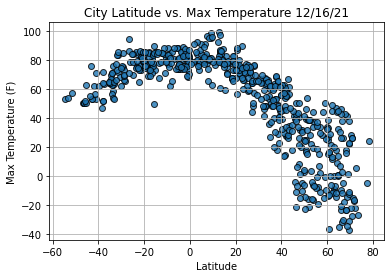

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

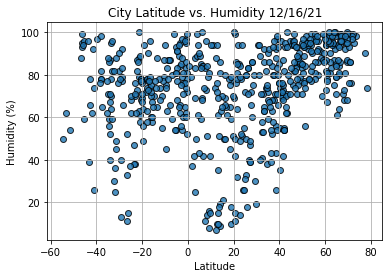

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

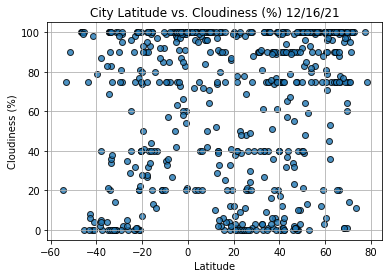

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

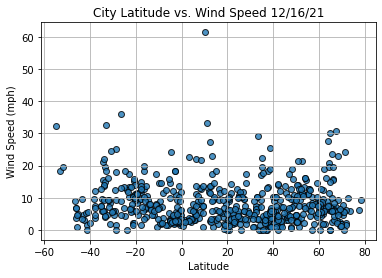

In [15]:
# for stem project
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create new dataframe from current dataframe to create
#the hemisphere dataframes
#The syntax to get a specific row from a current DataFrame is
index13 = city_data_df.loc[13]
index13


City                      Mataura
Cloudiness                    100
Country                        NZ
Date          2021-12-16 14:43:49
Humidity                       99
Lat                      -46.1927
Lng                      168.8643
Max Temp                    50.49
Wind Speed                   3.56
Name: 13, dtype: object

In [18]:
#We can also filter a DataFrame based on a value of a row. 
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
575    False
576     True
577    False
578     True
579     True
Name: Lat, Length: 580, dtype: bool

In [19]:
# If we want to return a DataFrame with all 
#data fitting the criteria, for latitudes 
#greater than or equal to 0, we can use the loc method on the city_data_df
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Nemuro,37,JP,2021-12-16 14:43:34,62,43.3236,145.5750,34.86,7.09
4,Kahului,1,US,2021-12-16 14:39:11,86,20.8947,-156.4700,74.84,0.00
5,Pangnirtung,20,CA,2021-12-16 14:43:47,64,66.1451,-65.7125,-9.40,5.75
7,Port Blair,10,IN,2021-12-16 14:43:48,74,11.6667,92.7500,78.93,12.97
8,Yantal,100,RU,2021-12-16 14:43:48,80,56.8471,105.2542,2.26,8.52


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

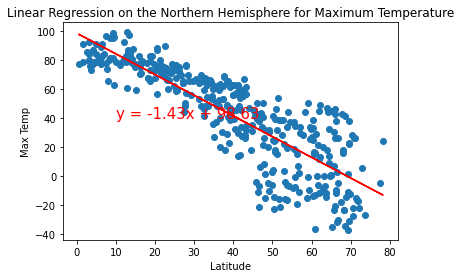

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


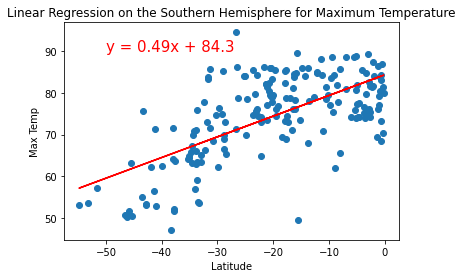

In [23]:
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

In [24]:
###Congratulations! You have plotted the regression line and equation for latitude and maximum temperature 
#for your Northern and Southern Hemispheres.
#The correlation between the latitude and the maximum 
#temperature is strong to very strong because the r-value 
#is less than –0.7 for the Northern Hemisphere and 
#greater than 0.7 for the Southern Hemisphere, as shown by the plots here.
#This means that as we approach the equator, 0° latitude, the temperatures become warmer. 
#And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

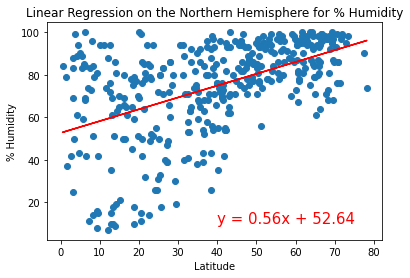

In [25]:
# Linear regression on the Northern Hemisphere % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

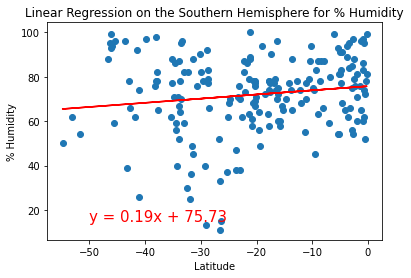

In [26]:
# Linear regression on the Southern Hemisphere % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

In [ ]:
# Linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))